In [2]:
import pandas as pd

In [345]:
df = pd.read_csv('medlr_assignment_dataset.csv')
df.head()

,id,name,source,prescription_required,retail_price,discounted_price,manufacturer,quantity,packaging_form,salts
0,source_6-75716,Dolo 1gm Tablet,source_6,False,45.58,40.11,micro labs,10 Tablet(s) in Strip,STRIP,Paracetamol / Acetaminophen(1.0 G)
1,source_2-39579,Dolo 1000mg Infusion,source_2,True,268.00,219.76,micro labs ltd,NaN,NaN,Paracetamol/Acetaminophen 1000mg
2,source_7-90343,Dolo 1000mg Tablet,source_7,False,45.58,35.10,micro labs ltd,10.0 tablets in 1 strip,NaN,Paracetamol (1000mg)
3,source_1-65076,Dolo 1000 mg Tablet 10's,source_1,True,45.50,40.00,micro labs ltd,10,Strip | Tablet,PARACETAMOL-1000MG
4,source_1-65077,Dolo 120 mg Suspension 60 ml,source_1,False,40.00,35.20,micro labs ltd,60,Bottle | Suspension,PARACETAMOL-120MG


In [ ]:
df.describe()

,retail_price,discounted_price
count,1367.000000,1384.000000
mean,145.609056,117.881290
std,765.382559,528.131513
min,2.000000,1.760000
25%,33.500000,29.032500
50%,59.630000,52.050000
75%,106.215000,93.345000
max,15620.000000,12496.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1448 entries, 0 to 1447
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1448 non-null   object 
 1   name                   1448 non-null   object 
 2   source                 1448 non-null   object 
 3   prescription_required  1448 non-null   bool   
 4   retail_price           1367 non-null   float64
 5   discounted_price       1384 non-null   float64
 6   manufacturer           1446 non-null   object 
 7   quantity               1184 non-null   object 
 8   packaging_form         931 non-null    object 
 9   salts                  1389 non-null   object 
dtypes: bool(1), float64(2), object(7)
memory usage: 103.4+ KB


In [ ]:
unique_values_per_column = df.nunique()
unique_values_per_column

,0
id,1448
name,1448
source,7
prescription_required,2
retail_price,653
discounted_price,1052
manufacturer,310
quantity,179
packaging_form,60
salts,774


In [ ]:
null_values_per_column = df.isnull().sum()
null_values_per_column

,0
id,0
name,0
source,0
prescription_required,0
retail_price,81
discounted_price,64
manufacturer,2
quantity,264
packaging_form,517
salts,59


In [346]:
#Outlier detection using z score

import numpy as np
from scipy.stats import zscore

z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).any(axis=1)
outliers.sum()

0

In [347]:
numerical_columns = ['retail_price', 'discounted_price']

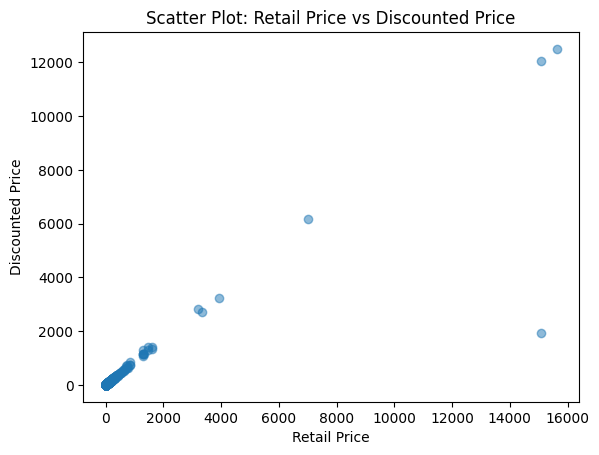

In [ ]:
# Outlier detection using scatter plot

import matplotlib.pyplot as plt
plt.scatter(df['retail_price'], df['discounted_price'], alpha=0.5)
plt.title("Scatter Plot: Retail Price vs Discounted Price")
plt.xlabel("Retail Price")
plt.ylabel("Discounted Price")
plt.show()

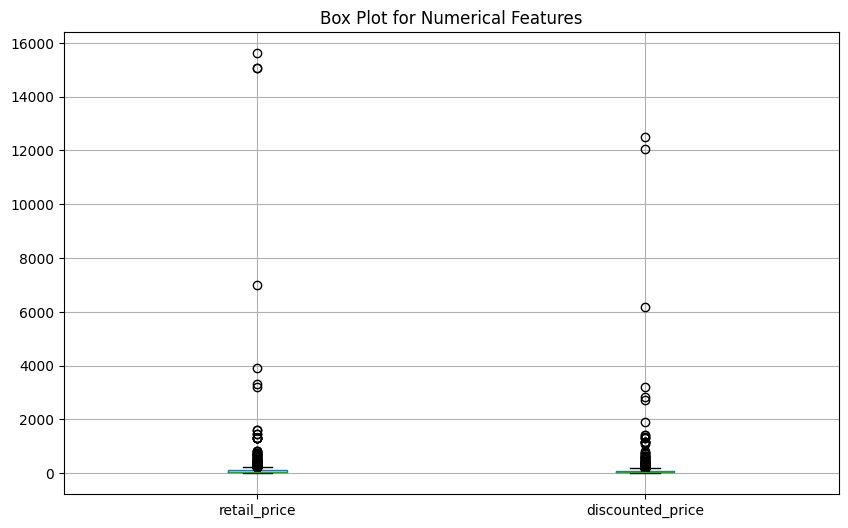

In [ ]:
# Outlier detection using box plot

import matplotlib.pyplot as plt

df[numerical_columns].boxplot(figsize=(10, 6))
plt.title("Box Plot for Numerical Features")
plt.show()

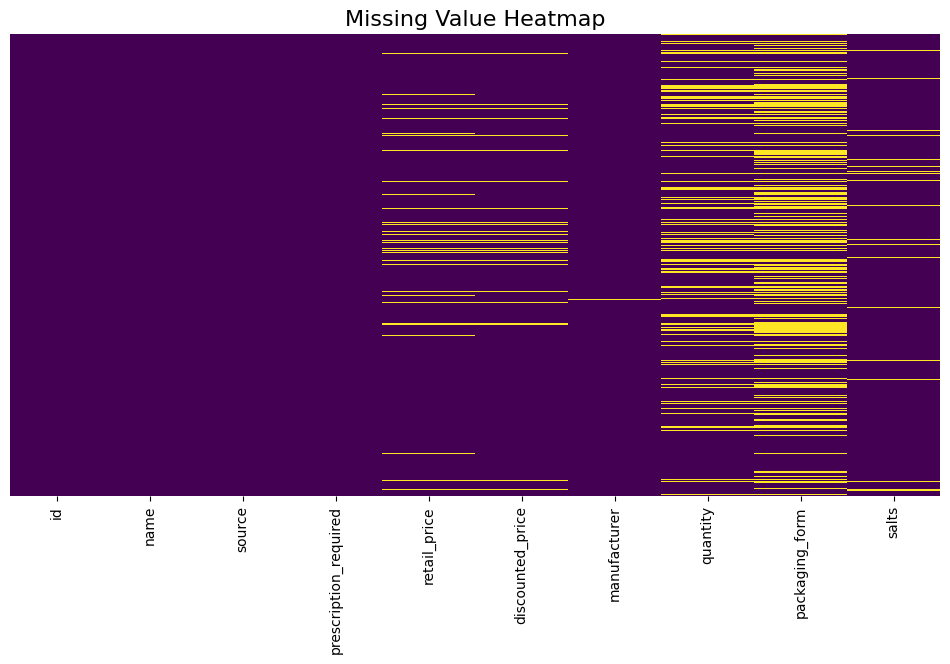

In [ ]:
# Missing value heatmap

import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Value Heatmap", fontsize=16)
plt.show()

In [348]:
# Extract numerical quantity from the column

import numpy as np
df['quantity_num'] = df['quantity'].str.extract(r'(\d+\.?\d*)').astype(float).fillna(np.nan)
df = df.drop(columns=["quantity"])
df.head()

,id,name,source,prescription_required,retail_price,discounted_price,manufacturer,packaging_form,salts,quantity_num
0,source_6-75716,Dolo 1gm Tablet,source_6,False,45.58,40.11,micro labs,STRIP,Paracetamol / Acetaminophen(1.0 G),10.0
1,source_2-39579,Dolo 1000mg Infusion,source_2,True,268.00,219.76,micro labs ltd,NaN,Paracetamol/Acetaminophen 1000mg,NaN
2,source_7-90343,Dolo 1000mg Tablet,source_7,False,45.58,35.10,micro labs ltd,NaN,Paracetamol (1000mg),10.0
3,source_1-65076,Dolo 1000 mg Tablet 10's,source_1,True,45.50,40.00,micro labs ltd,Strip | Tablet,PARACETAMOL-1000MG,10.0
4,source_1-65077,Dolo 120 mg Suspension 60 ml,source_1,False,40.00,35.20,micro labs ltd,Bottle | Suspension,PARACETAMOL-120MG,60.0


In [349]:
numerical_columns.append("quantity_num")

In [350]:
# KNN imputing to fill missing values for numerical features
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
df[numerical_columns] = knn_imputer.fit_transform(df[numerical_columns])

In [351]:
# Replacing by unknown for categorical variables

df['packaging_form'].fillna('Unknown', inplace=True)
df['salts'].fillna('Unknown', inplace=True)

<ipython-input-351-932d90237d77>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['packaging_form'].fillna('Unknown', inplace=True)
<ipython-input-351-932d90237d77>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [352]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

def preprocess_text(text):
    text = text.lower()
    text = text.replace("/", " ")
    text = re.sub(r"[^a-zA-Z0-9 ]", " ", text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    preprocessed_text = " ".join(tokens)
    return preprocessed_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [353]:
# Preprocess name and salt texts

df['salts'] = df['salts'].apply(preprocess_text)
df['name'] = df['name'].apply(preprocess_text)
df.head()

,id,name,source,prescription_required,retail_price,discounted_price,manufacturer,packaging_form,salts,quantity_num
0,source_6-75716,dolo 1gm tablet,source_6,False,45.58,40.11,micro labs,STRIP,paracetamol acetaminophen 1 0 g,10.0
1,source_2-39579,dolo 1000mg infusion,source_2,True,268.00,219.76,micro labs ltd,Unknown,paracetamol acetaminophen 1000mg,19.0
2,source_7-90343,dolo 1000mg tablet,source_7,False,45.58,35.10,micro labs ltd,Unknown,paracetamol 1000mg,10.0
3,source_1-65076,dolo 1000 mg tablet 10,source_1,True,45.50,40.00,micro labs ltd,Strip | Tablet,paracetamol 1000mg,10.0
4,source_1-65077,dolo 120 mg suspension 60 ml,source_1,False,40.00,35.20,micro labs ltd,Bottle | Suspension,paracetamol 120mg,60.0


In [354]:
df.head()

,id,name,source,prescription_required,retail_price,discounted_price,manufacturer,packaging_form,salts,quantity_num
0,source_6-75716,dolo 1gm tablet,source_6,False,45.58,40.11,micro labs,STRIP,paracetamol acetaminophen 1 0 g,10.0
1,source_2-39579,dolo 1000mg infusion,source_2,True,268.00,219.76,micro labs ltd,Unknown,paracetamol acetaminophen 1000mg,19.0
2,source_7-90343,dolo 1000mg tablet,source_7,False,45.58,35.10,micro labs ltd,Unknown,paracetamol 1000mg,10.0
3,source_1-65076,dolo 1000 mg tablet 10,source_1,True,45.50,40.00,micro labs ltd,Strip | Tablet,paracetamol 1000mg,10.0
4,source_1-65077,dolo 120 mg suspension 60 ml,source_1,False,40.00,35.20,micro labs ltd,Bottle | Suspension,paracetamol 120mg,60.0


In [355]:
# Generating embeddings for name and salt

from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

name_embeddings = model.encode(df['name'].tolist())
salts_embeddings = model.encode(df['salts'].tolist())

In [356]:
# Scaling the embeddings

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
name_embeddings_scaled = scaler.fit_transform(name_embeddings)
salts_embeddings_scaled = scaler.fit_transform(salts_embeddings)

# Encoding the prescription
prescription_encoded = df['prescription_required'].astype(int).values.reshape(-1, 1)

In [373]:
# Experimenting PCA

# from sklearn.decomposition import PCA

# combined_embeddings = np.hstack([name_embeddings, salts_embeddings])
# pca = PCA(n_components=10)
# features = pca.fit_transform(features)

In [ ]:
# Experimenting TSNE

# from sklearn.manifold import TSNE

# tsne = TSNE(n_components=2, random_state=42)
# embeddings_2d = tsne.fit_transform(scaled_features)

In [357]:
features = np.hstack([name_embeddings_scaled, salts_embeddings_scaled, prescription_encoded])

In [150]:
features.shape

(1448, 769)

In [358]:
!pip uninstall umap -y
!pip install umap-learn

In [359]:
# Dimension reduction using UMAP

import umap.umap_ as umap

reducer = umap.UMAP(n_neighbors=8,
                    min_dist=0.097,
                    metric='euclidean',
                    random_state=42)

features = reducer.fit_transform(features)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
# Experimenting DBSCAN

# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import silhouette_score

# def silhouette_score_custom(estimator, X):
#     labels = estimator.fit_predict(X)
#     if len(np.unique(labels)) < 2:
#         return -1
#     else:
#         return silhouette_score(X, labels, metric='cosine')

# param_grid = {
#     'eps': np.arange(0.1, 2, 0.1),
#     'min_samples': [3, 5, 7, 10]
# }


# grid_search = GridSearchCV(
#     estimator=dbscan,
#     param_grid=param_grid,
#     scoring=silhouette_score_custom,
#     cv=5
# )

# grid_search.fit(features)
# best_params = grid_search.best_params_

# dbscan = DBSCAN(**best_params, metric='cosine')
# df['cluster'] = dbscan.fit_predict(features)

# cluster_summary = df.groupby('cluster').agg(
#     count=('name', 'count'),
#     unique_manufacturers=('manufacturer', 'nunique')
# ).reset_index()

# grid_search.best_score_

0.566501877675497

In [360]:
!pip install hdbscan

In [361]:
# Using HDBSCAN

from sklearn.model_selection import GridSearchCV
import hdbscan
from sklearn.metrics import silhouette_score

def silhouette_score_custom(estimator, X):
    labels = estimator.fit_predict(X)
    if len(np.unique(labels)) < 2:
        return -1
    else:
        return silhouette_score(X, labels, metric='euclidean')

clusterer = hdbscan.HDBSCAN(metric='euclidean')

param_grid = {
    'min_cluster_size': [5, 10, 15, 20],
    'min_samples': [5, 7, 10, 15, 20],
    'cluster_selection_epsilon': [0.25, 0.5, 1, 1.5, 2]
}

grid_search = GridSearchCV(
    estimator=clusterer,
    param_grid=param_grid,
    scoring= silhouette_score_custom,
    cv=5,
    n_jobs=-1
)

grid_search.fit(features)
best_params = grid_search.best_params_

best_clusterer = hdbscan.HDBSCAN(**best_params, metric='euclidean')
df['cluster'] = best_clusterer.fit_predict(features)

print(grid_search.best_score_)
print(best_params)

0.7003789782524109
{'cluster_selection_epsilon': 1, 'min_cluster_size': 5, 'min_samples': 5}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [370]:
# Generating cluster summary

cluster_summary = df.groupby('cluster').agg(
    count=('name', 'count'),
    unique_manufacturers=('manufacturer', 'nunique')
).reset_index()

In [363]:
cluster_summary

,cluster,count,unique_manufacturers
0,0,10,8
1,1,66,48
2,2,11,1
3,3,19,3
4,4,15,2
5,5,53,33
6,6,12,1
7,7,38,3
8,8,8,2
9,9,74,6


In [364]:
df.tail()

,id,name,source,prescription_required,retail_price,discounted_price,manufacturer,packaging_form,salts,quantity_num,cluster
1443,source_6-50522,cetirizine 10 mg tablet 10,source_6,True,21.06,17.90,cadila pharmaceuticals ltd,STRIP,cetirizine 10 0 mg,10.0,13
1444,source_1-42499,cetirizine hydrochloride 10 mg tablet 10,source_1,True,21.00,18.50,glenmark pharmaceuticals ltd,Strip | Tablet,cetirizine 10mg,10.0,13
1445,source_6-50523,cetirizine syrup 30ml,source_6,True,19.36,16.46,glaxosmithkline,BOTTLE,cetirizine,30.0,21
1446,source_7-58760,cetirizine tablet,source_7,True,21.00,15.00,cadila pharmaceuticals ltd,Unknown,cetirizine 10mg,10.0,13
1447,source_1-42500,cetirizine tablet 15,source_1,True,31.50,27.70,zydus cadila,Strip | Tablet,cetirizine 10mg,15.0,13


<ipython-input-365-a95bb7264358>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=df, palette='viridis')


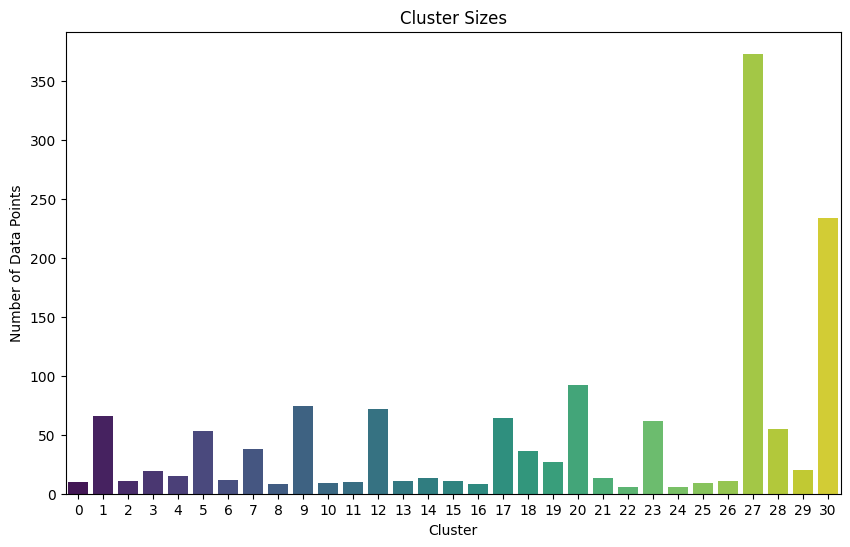

In [365]:
# Visualising cluster sizes

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=df, palette='viridis')
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.show()

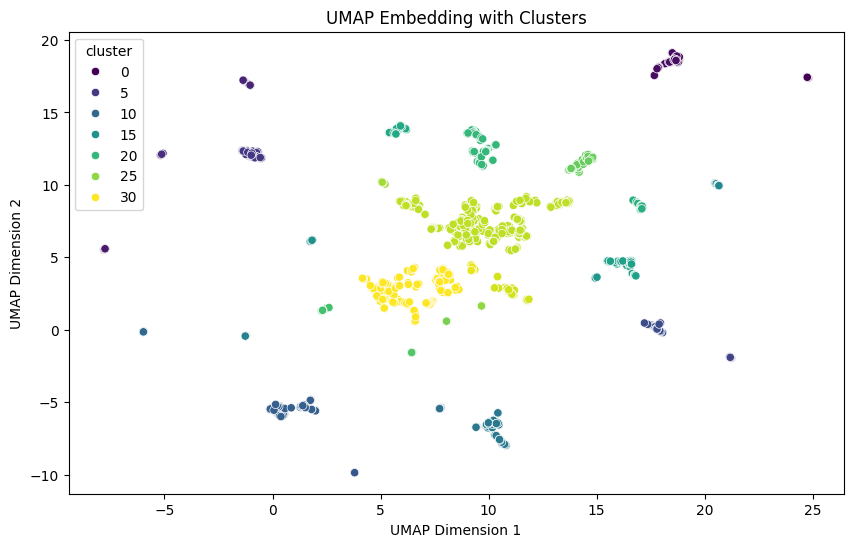

In [366]:
# Visualising clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(x=features[:, 0], y=features[:, 1], hue=df['cluster'], palette='viridis')
plt.title('UMAP Embedding with Clusters')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

In [367]:
# Checking clusters
check = df[df['cluster'] == 27]
check

,id,name,source,prescription_required,retail_price,discounted_price,manufacturer,packaging_form,salts,quantity_num,cluster
36,source_6-75733,dolo g tablet,source_6,True,30.91,27.200,integra life sciences pvt ltd,STRIP,dicyclomine mefenamic acid,10.0,27
40,source_6-75735,dolo k 50 mg strip 10 tablet,source_6,True,7.50,6.600,bosch pharmaceuticals pvt ltd,STRIP,diclofenac 50 0 mg,10.0,27
41,source_6-75736,dolo tablet,source_6,True,38.10,33.530,integra life sciences pvt ltd,STRIP,drotaverine mefenamic acid,10.0,27
54,source_6-75741,dolo plus tablet,source_6,True,10.00,8.800,mankind pharmaceuticals ltd,STRIP,diclofenac 50 0 mg paracetamol acetaminophen 5...,10.0,27
55,source_6-75742,dolo relieve tablet,source_6,True,18.00,15.840,medico health care,STRIP,diclofenac 50 0 mg paracetamol acetaminophen 5...,10.0,27
...,...,...,...,...,...,...,...,...,...,...,...
1398,source_6-21080,aspirin protect 100mg strip 10 tablet,source_6,True,89.60,139.084,bayer zydus pharma,STRIP,aspirin acetyl salicylic acid 100 0 mg,10.0,27
1421,source_6-14479,amlodipine 5mg plus atenolol 50mg strip 10 tab...,source_6,True,60.00,40.200,tulip lab pvt ltd,STRIP,amlodipine 5 0 mg atenolol 50 0 mg,10.0,27
1422,source_6-14480,amlodipine 5mg strip 10 tablet medlife pure ge...,source_6,True,25.00,18.750,medlife,STRIP,amlodipine 5 0 mg,10.0,27
1423,source_1-16342,amlodipine 5 mg tablet 10,source_1,True,7.00,6.160,jan aushadhi marketing federation ltd,Strip | Tablet,amlodipine 5mg,10.0,27


In [368]:
# Saving the updated database
df.to_csv('medlr_assignment_dataset_clustered.csv', index=False)

In [371]:
# Cluster summary with most common medicine

cluster_identifiers = df.groupby('cluster')['name'].agg(lambda x: x.value_counts().index[0]).reset_index()

cluster_identifiers.columns = ['cluster', 'most_frequent_medicine']

cluster_summary = pd.merge(cluster_summary, cluster_identifiers, on='cluster')

cluster_summary

,cluster,count,unique_manufacturers,most_frequent_medicine
0,0,10,8,ciprofloxacin 10mg infusion
1,1,66,48,dolo cold syrup 50 ml
2,2,11,1,zocon l 1 cream 10 gm
3,3,19,3,doloneuron pg 75mg capsule
4,4,15,2,doloact mouth paint
5,5,53,33,zerodol gel 30gm
6,6,12,1,risdone forte tablet
7,7,38,3,risdone mt 2mg tablet
8,8,8,2,doloxy cv 1 2gm injection
9,9,74,6,zocon 150 tablet 6


In [372]:
# Save cluster summary

cluster_summary.to_csv('cluster_summary.csv', index=False)